
<h1><font color='green'>Predictive Modeling of Car Prices for Market Entry Strategy in the US</font></h1>

<h1><font color='green'>Problem description</font></h1>

**A Chinese automobile company is planning to enter the US market by setting up a local manufacturing unit to compete with established US and European car manufacturers. To strategize effectively, they have enlisted the help of an automobile consulting firm to identify and analyze the key factors influencing car prices in the American market. This knowledge will aid the company in designing cars and formulating business strategies that align with market expectations and pricing dynamics**

***The consulting firm has gathered extensive data from various market surveys, encompassing a wide range of car types and models available in the American market. The primary objectives of this analysis are to:***

* **Identify the significant variables that predict the price of a car.**
* **Evaluate how well these variables explain the variations in car prices.**


<h1><font color='green'>Business Goal</font></h1>

***The goal is to develop a predictive model for car prices using the available independent variables. This model will provide the management with insights into the relationship between car features and their prices, enabling them to:***

* ***Adjust car designs to meet targeted price points.***
* ***Formulate business strategies that are competitive in the US market.***
* ***Gain a deeper understanding of pricing dynamics in a new and different market environment.***

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<h1><font color='green'>Data Loading</font></h1>

In [2]:



df =pd.read_csv("/content/CarPrice_Assignment.csv")

In [3]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
df['price']

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

<h1><font color='green'>Dataset Insights</font></h1>

**The dataset includes 205 records and 26 columns with attributes such as car name, body style, engine type, and various performance metrics. Here are some key insights:**

* **Symboling: Insurance risk rating**
* **CarName: The name of the car.**
* **Fueltype: Type of fuel (gas/diesel).**
* **Aspiration: Type of aspiration (std/turbo)**.
* **Doornumber: Number of doors (two/four)**.
* **Carbody: Body style of the car**.
* **Drivewheel: Drive wheel type (fwd/rwd/4wd)**.
* **Enginelocation: Engine location (front/rear)**.
* **Wheelbase, Car Length, Car Width, Car Height: Dimensional attributes.**
* **Curbweight: Weight of the car without occupants or baggage.**
* **Enginetype, Cylindernumber, Enginesize: Engine characteristics.**
* **Fueltank Capacity: Fuel tank capacity.**
* **Boreratio, Stroke, Compressionratio: Engine specifications.**
* **Horsepower, Peakrpm: Performance metrics.**
* **Citympg, Highwaympg: Fuel efficiency metrics**.
* **Price: Price of the car**

In [5]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [7]:
df.shape

(205, 26)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [12]:
df['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [13]:
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [14]:
df['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [15]:
df['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [16]:
df['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [17]:
len(df['CarName'].unique())

147

In [18]:
df.enginelocation.unique()

array(['front', 'rear'], dtype=object)

In [19]:
df.drivewheel.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [20]:
numerical_col = df.select_dtypes(include=['int64','float64'])
numerical_col

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [21]:
numerical_col.columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

*  **Above are the numerical columns in the dataset**

In [22]:
categorical_col = df.select_dtypes(include='object')
categorical_col

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [23]:
categorical_col.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

*  **Above are  the categorical columns**

<h1><font color='green'>Understanding the distribution of the data</font></h1>


In [24]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [25]:
categorical_col.describe().T

,count,unique,top,freq
CarName,205,147,toyota corona,6
fueltype,205,2,gas,185
aspiration,205,2,std,168
doornumber,205,2,four,115
carbody,205,5,sedan,96
drivewheel,205,3,fwd,120
enginelocation,205,2,front,202
enginetype,205,7,ohc,148
cylindernumber,205,7,four,159
fuelsystem,205,8,mpfi,94


<h1><font color='green'>Getting Insights from the Numerical columns</font></h1>


In [26]:
len(numerical_col.columns)

16

array([[<Axes: title={'center': 'car_ID'}>,
        <Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'wheelbase'}>,
        <Axes: title={'center': 'carlength'}>],
       [<Axes: title={'center': 'carwidth'}>,
        <Axes: title={'center': 'carheight'}>,
        <Axes: title={'center': 'curbweight'}>,
        <Axes: title={'center': 'enginesize'}>],
       [<Axes: title={'center': 'boreratio'}>,
        <Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'compressionratio'}>,
        <Axes: title={'center': 'horsepower'}>],
       [<Axes: title={'center': 'peakrpm'}>,
        <Axes: title={'center': 'citympg'}>,
        <Axes: title={'center': 'highwaympg'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

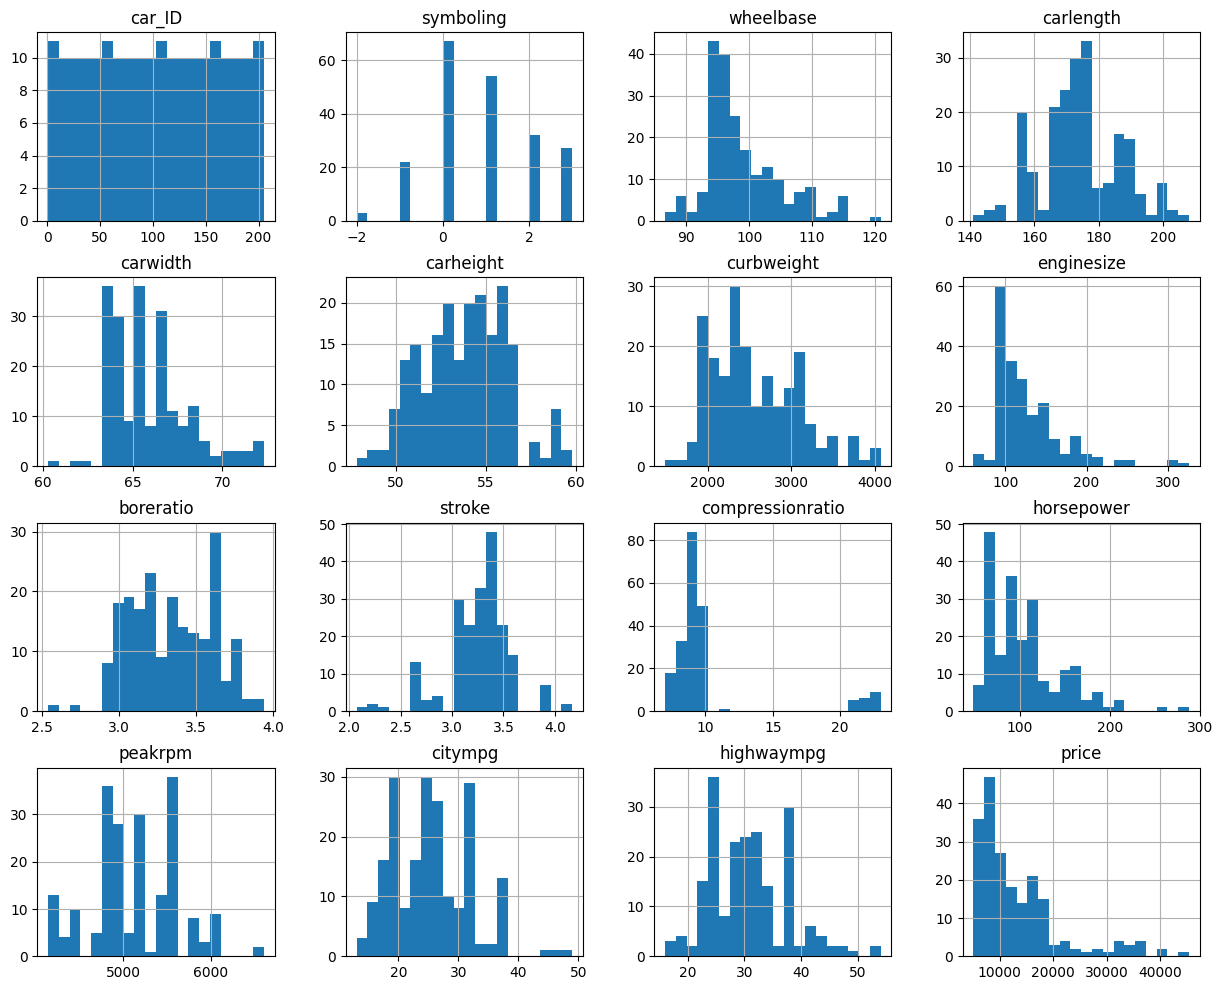

In [27]:
numerical_col.hist(bins=20,figsize=(15,12),layout=(4,4))

<Figure size 2000x1000 with 0 Axes>

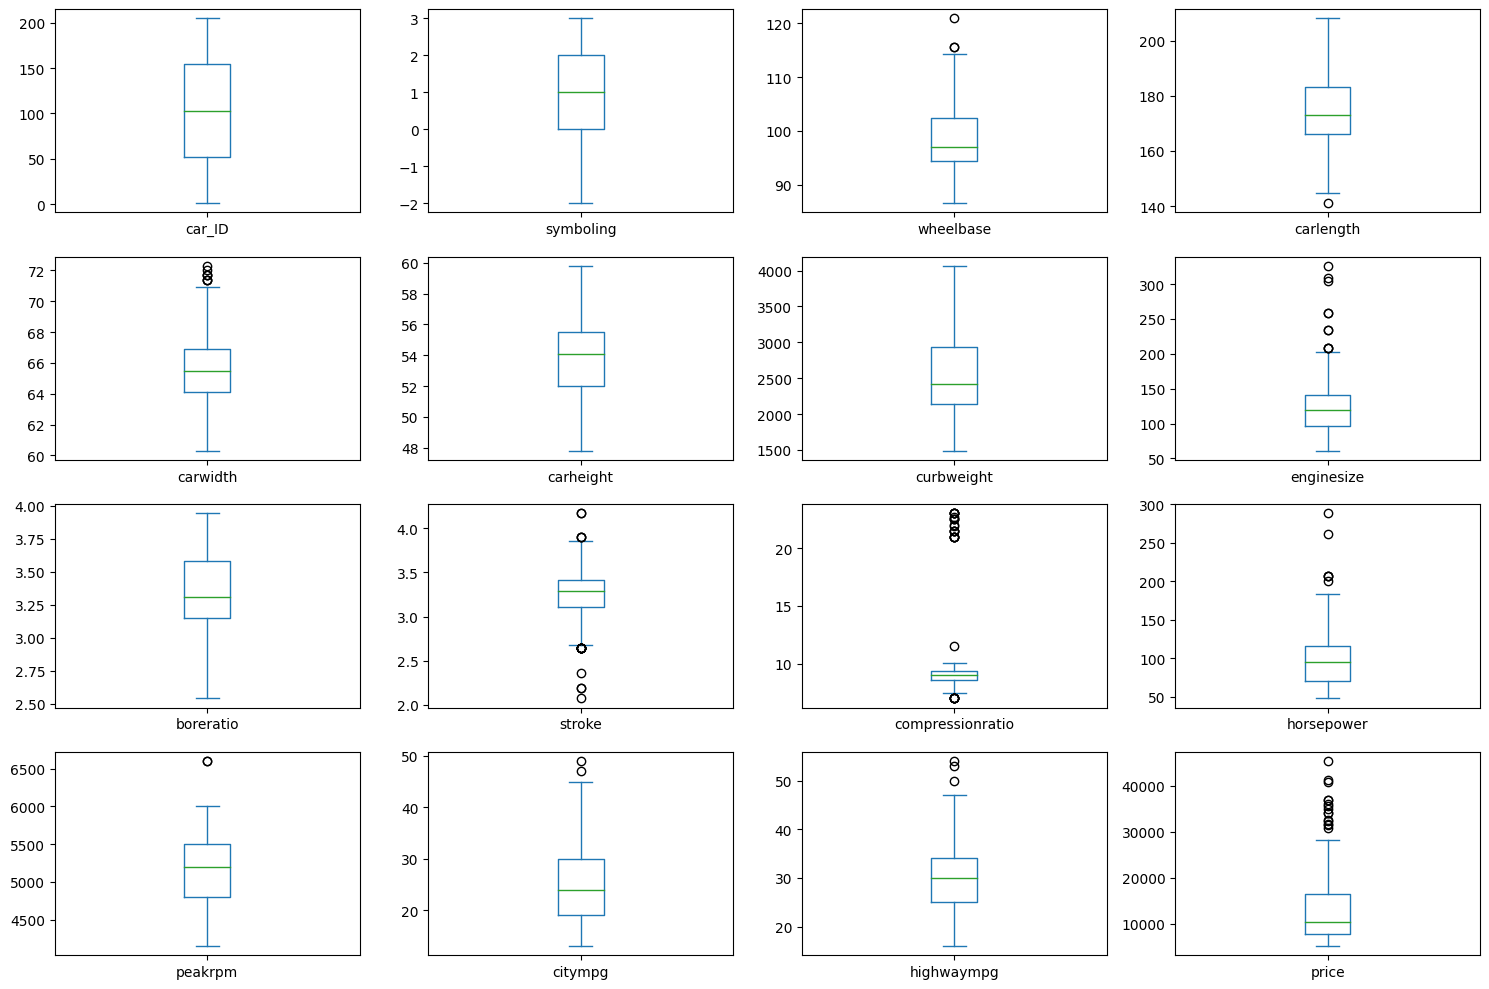

In [28]:
plt.figure(figsize=(20, 10))
numerical_col.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, sharey=False, figsize=(15, 10))
plt.tight_layout()
plt.show()


<h1><font color='green'>THE NUMERICAL COLUMNS MENTIONED BELOW CONTAIN OUTLIERS:</font></h1>


* **WHEELBASE**
  * Outliers present above the upper whisker.

* **CARLENGTH**
  * Outliers present below the lower whisker.

* **CARWIDTH**
  * Outliers present above the upper whisker.

* **ENGINESIZE**
  * Outliers present above the upper whisker.

* **STROKE**
  * Outliers present both below the lower whisker and above the upper whisker.

* **COMPRESSIONRATIO**
  * Significant number of outliers present above the upper whisker.

* **HORSEPOWER**
  * Outliers present above the upper whisker.

* **PEAKRPM**
  * Outliers present above the upper whisker.

* **CITYMPG**
  * Outliers present above the upper whisker.

* **HIGHWAYMPG**
  * Outliers present above the upper whisker.

* **PRICE**
  * Outliers present above the upper whisker.



<h1><font color='green'>Correlation</font></h1>

In [29]:
corr=numerical_col.corr()
corr

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


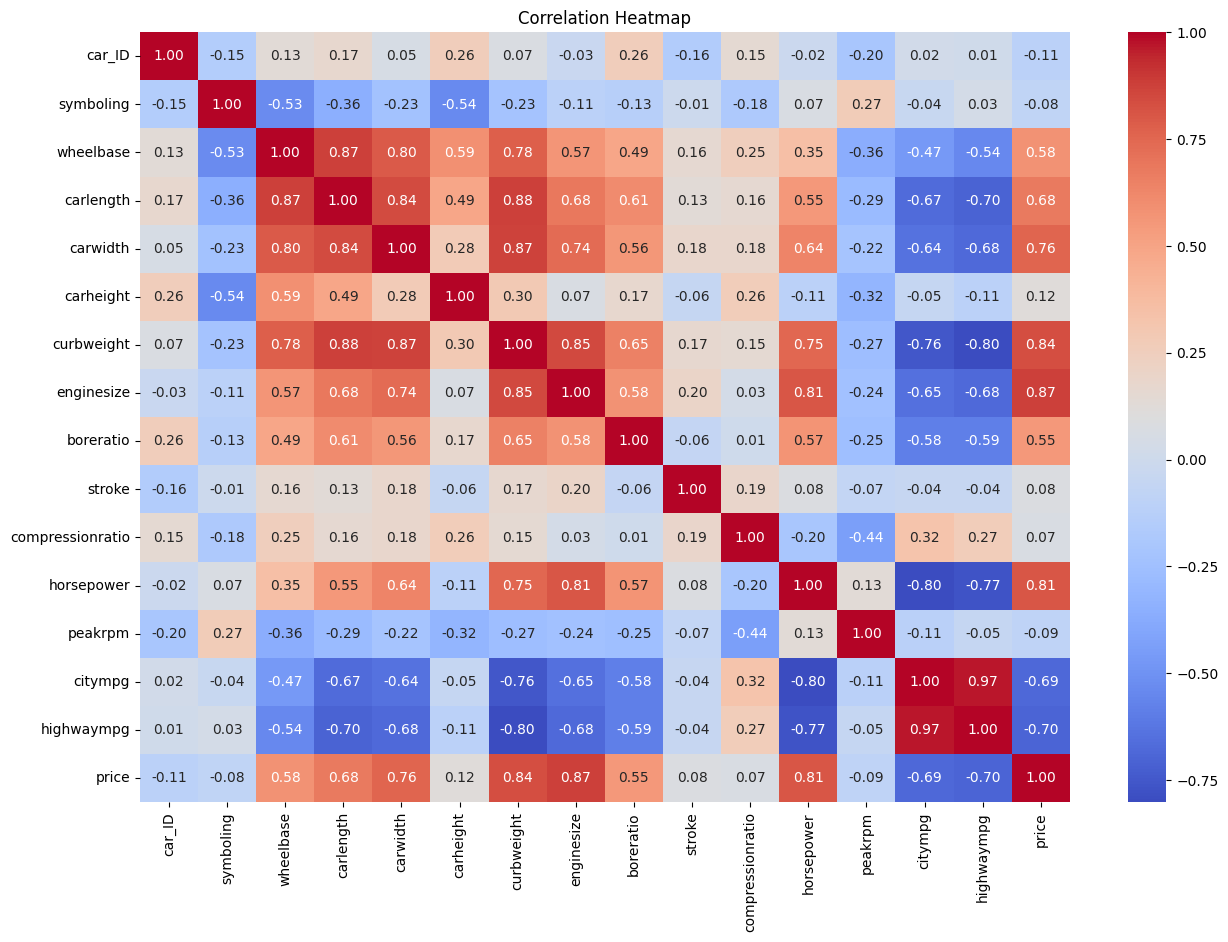

In [30]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [31]:

def correlated_pairs(corr,thershold=0.85):
  correlated_list = []
  for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        if corr.iloc[i, j] > thershold:
            correlated_list.append((corr.columns[i], corr.columns[j]))
  return correlated_list



correlation = correlated_pairs(corr,thershold=0.80)
correlation


[('wheelbase', 'carlength'),
 ('carlength', 'carwidth'),
 ('carlength', 'curbweight'),
 ('carwidth', 'curbweight'),
 ('curbweight', 'enginesize'),
 ('curbweight', 'price'),
 ('enginesize', 'horsepower'),
 ('enginesize', 'price'),
 ('horsepower', 'price'),
 ('citympg', 'highwaympg')]


<h1><font color='green'>Correlation Analysis Results:</font></h1>


* **WHEELBASE and CARLENGTH:** High correlation suggests that these two variables might provide redundant information.
* **CARLENGTH and CARWIDTH:** These variables are highly correlated, indicating redundancy.
* **CARLENGTH and CURBWEIGHT**: High correlation indicates potential multicollinearity.
* **CARWIDTH and CURBWEIGHT**: These variables are highly correlated, indicating redundancy.
* **CURBWEIGHT and ENGINESIZE:** High correlation suggests potential multicollinearity.
* **CURBWEIGHT and PRICE:** High correlation indicates that these variables might provide overlapping information.
* **ENGINESIZE and HORSEPOWER:** These variables are highly correlated, suggesting redundancy.
* **ENGINESIZE and PRICE:** High correlation indicates potential multicollinearity.
* **HORSEPOWER and PRICE:** These variables are highly correlated, suggesting redundancy.
* **CITYMPG and HIGHWAYMPG:** High correlation suggests potential multicollinearity.




<h1><font color='green'>Data Preprocessing</font></h1>


In [32]:
df.drop('carlength',inplace=True,axis=1)

In [33]:
df.drop('enginesize',inplace=True,axis=1)

In [34]:
df.drop('citympg',inplace=True,axis=1)

* **I have removed the columns with multicollinearity.**
   * **Removed**
        1. **carlength**
        2. **enginesize**
        3. **citympg**




In [35]:
df['CarName'].head(20)

0           alfa-romero giulia
1          alfa-romero stelvio
2     alfa-romero Quadrifoglio
3                  audi 100 ls
4                   audi 100ls
5                     audi fox
6                   audi 100ls
7                    audi 5000
8                    audi 4000
9          audi 5000s (diesel)
10                    bmw 320i
11                    bmw 320i
12                      bmw x1
13                      bmw x3
14                      bmw z4
15                      bmw x4
16                      bmw x5
17                      bmw x3
18            chevrolet impala
19       chevrolet monte carlo
Name: CarName, dtype: object

In [36]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [37]:
import re

In [38]:
regex = r'^(\w+)(?:-\w+)?'
df['Company Name'] = df['CarName'].apply(lambda x:re.match(regex,x).group() if re.match(regex,x) else None )

In [39]:
df['Company Name'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [40]:
corrections = {
    'maxda': 'mazda',
    'porcshce': 'porsche',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen',
    'toyouta': 'toyota'
}
df['Company Name'].replace(corrections,inplace=True)

In [41]:
df['Company Name'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

*  **i have  extracted the company name from the column car name**
*   **And also there are some spelling mistakes in the company name , corrected** **the spellings also**

In [42]:

df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price,Company Name
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,four,mpfi,3.47,2.68,9.0,111,5000,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,four,mpfi,3.47,2.68,9.0,111,5000,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,six,mpfi,2.68,3.47,9.0,154,5000,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,four,mpfi,3.19,3.40,10.0,102,5500,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,five,mpfi,3.19,3.40,8.0,115,5500,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,four,mpfi,3.78,3.15,9.5,114,5400,28,16845.0,volvo
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,four,mpfi,3.78,3.15,8.7,160,5300,25,19045.0,volvo
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,six,mpfi,3.58,2.87,8.8,134,5500,23,21485.0,volvo
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,six,idi,3.01,3.40,23.0,106,4800,27,22470.0,volvo


In [43]:
df.drop('CarName',inplace=True,axis=1)

In [44]:
df.drop('car_ID',inplace=True,axis=1)

*  **There is no relevant info in the columns Carname and car_id so i have removed the columns**



<h1><font color='green'>Outliers detection and removal</font></h1>


In [45]:
def handle_outliers_iqr_impute(df, num_columns, k=1.5):
    df_cleaned = df.copy()
    for col in num_columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - k * iqr
        upper_bound = q3 + k * iqr

        # Impute outliers with lower or upper whisker values
        df_cleaned[col] = np.where(df_cleaned[col] < lower_bound, lower_bound, df_cleaned[col])
        df_cleaned[col] = np.where(df_cleaned[col] > upper_bound, upper_bound, df_cleaned[col])

    return df_cleaned

In [46]:
num_columns = df.select_dtypes(include='number').columns
df = handle_outliers_iqr_impute(df, num_columns)

In [47]:
num_Cols2 = df.select_dtypes(include=[np.number])

<Figure size 2000x1000 with 0 Axes>

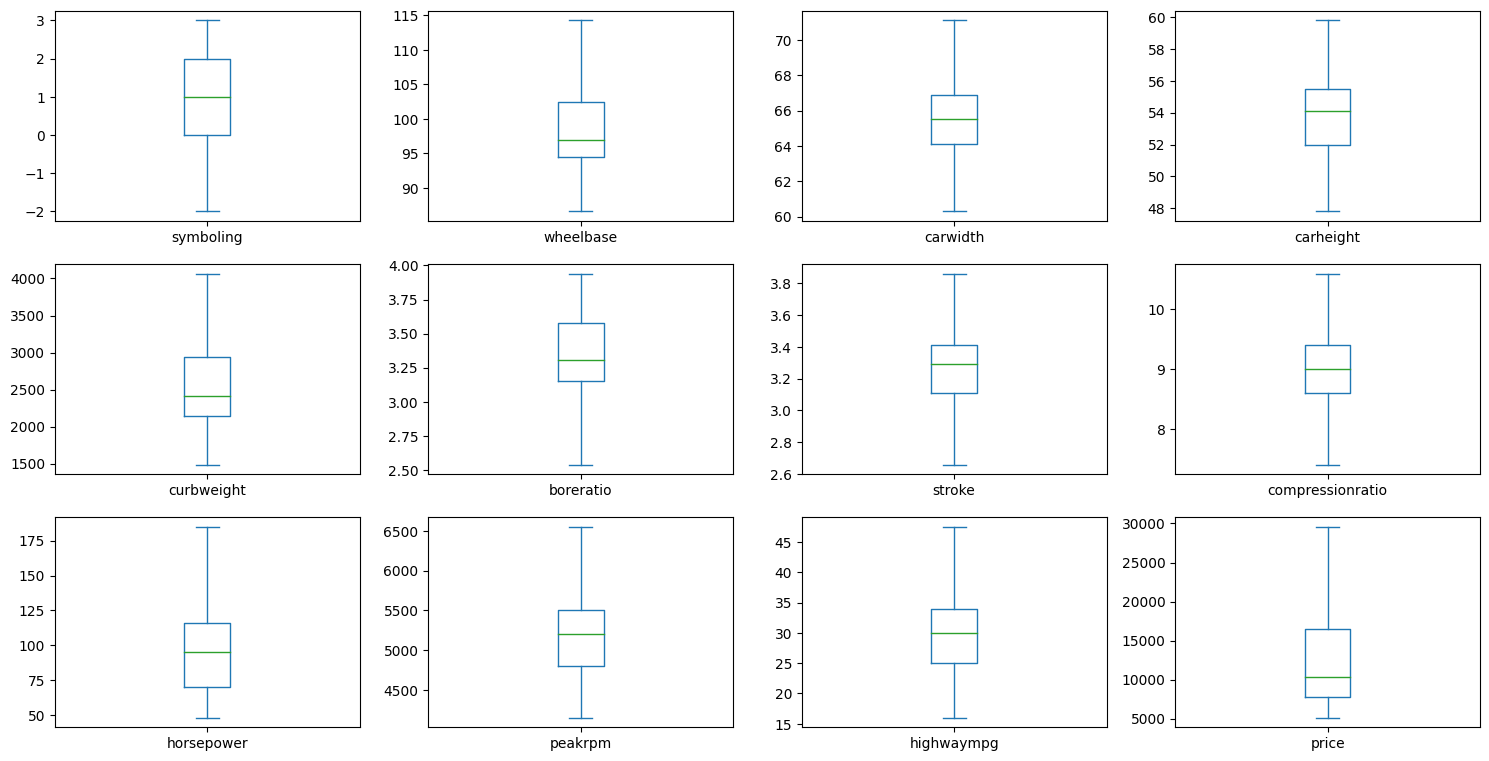

In [48]:
plt.figure(figsize=(20, 10))
df.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, sharey=False, figsize=(15, 10))
plt.tight_layout()
plt.show()

*  **All the outliers are removed and the data is cleaned**

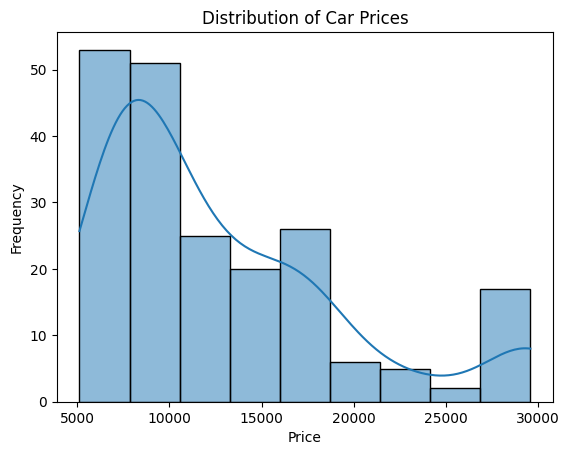

In [49]:
sns.histplot(df, x='price', kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


<h1><font color='green'>Feature Scaling numerical columns</font></h1>

In [50]:
from sklearn.preprocessing import MinMaxScaler
num_cols = df.select_dtypes(include=['int64', 'float64'])
# Initialize the StandardScaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
scaled_data = scaler.fit_transform(num_cols)

# Replace the original numerical columns with the scaled ones
df[num_cols.columns] = scaled_data
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carwidth,carheight,...,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price,Company Name
0,1.0,gas,std,two,convertible,rwd,front,0.072333,0.351852,0.083333,...,four,mpfi,0.664286,0.016667,0.50000,0.459854,0.354167,0.349206,0.342513,alfa-romero
1,1.0,gas,std,two,convertible,rwd,front,0.072333,0.351852,0.083333,...,four,mpfi,0.664286,0.016667,0.50000,0.459854,0.354167,0.349206,0.465379,alfa-romero
2,0.6,gas,std,two,hatchback,rwd,front,0.285714,0.481481,0.383333,...,six,mpfi,0.100000,0.675000,0.50000,0.773723,0.354167,0.317460,0.465379,alfa-romero
3,0.8,gas,std,four,sedan,fwd,front,0.477396,0.546296,0.541667,...,four,mpfi,0.464286,0.616667,0.81250,0.394161,0.562500,0.444444,0.361116,audi
4,0.8,gas,std,four,sedan,4wd,front,0.462929,0.564815,0.541667,...,five,mpfi,0.464286,0.616667,0.18750,0.489051,0.562500,0.190476,0.504222,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.2,gas,std,four,sedan,rwd,front,0.813743,0.796296,0.641667,...,four,mpfi,0.885714,0.408333,0.65625,0.481752,0.520833,0.380952,0.479485,volvo
201,0.2,gas,turbo,four,sedan,rwd,front,0.813743,0.787037,0.641667,...,four,mpfi,0.885714,0.408333,0.40625,0.817518,0.479167,0.285714,0.569437,volvo
202,0.2,gas,std,four,sedan,rwd,front,0.813743,0.796296,0.641667,...,six,mpfi,0.742857,0.175000,0.43750,0.627737,0.562500,0.222222,0.669202,volvo
203,0.2,diesel,turbo,four,sedan,rwd,front,0.813743,0.796296,0.641667,...,six,idi,0.335714,0.616667,1.00000,0.423358,0.270833,0.349206,0.709476,volvo


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    float64
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    float64
 11  enginetype        205 non-null    object 
 12  cylindernumber    205 non-null    object 
 13  fuelsystem        205 non-null    object 
 14  boreratio         205 non-null    float64
 15  stroke            205 non-null    float64
 16  compressionratio  205 non-null    float64
 1


<h1><font color='green'>Encoding categorical columns</font></h1>

In [57]:
cols_to_encode = list(df.select_dtypes(include=['object']))
cols_to_encode

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'Company Name']

In [56]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

cols_to_encode = list(df.select_dtypes(include=['object']))
cols_to_encode


#label_encoder is the object of LabelEncode
label_encoder = LabelEncoder()

# Initialize a new DataFrame to store the encoded columns
df_label = df.copy()

# Encode each column in cols_to_encode
for col in cols_to_encode:
    df_label[col] = label_encoder.fit_transform(df[col])

df_label

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carwidth,carheight,...,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price,Company Name
0,1.0,1,0,1,0,2,0,0.072333,0.351852,0.083333,...,2,5,0.664286,0.016667,0.50000,0.459854,0.354167,0.349206,0.342513,1
1,1.0,1,0,1,0,2,0,0.072333,0.351852,0.083333,...,2,5,0.664286,0.016667,0.50000,0.459854,0.354167,0.349206,0.465379,1
2,0.6,1,0,1,2,2,0,0.285714,0.481481,0.383333,...,3,5,0.100000,0.675000,0.50000,0.773723,0.354167,0.317460,0.465379,1
3,0.8,1,0,0,3,1,0,0.477396,0.546296,0.541667,...,2,5,0.464286,0.616667,0.81250,0.394161,0.562500,0.444444,0.361116,2
4,0.8,1,0,0,3,0,0,0.462929,0.564815,0.541667,...,1,5,0.464286,0.616667,0.18750,0.489051,0.562500,0.190476,0.504222,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.2,1,0,0,3,2,0,0.813743,0.796296,0.641667,...,2,5,0.885714,0.408333,0.65625,0.481752,0.520833,0.380952,0.479485,22
201,0.2,1,1,0,3,2,0,0.813743,0.787037,0.641667,...,2,5,0.885714,0.408333,0.40625,0.817518,0.479167,0.285714,0.569437,22
202,0.2,1,0,0,3,2,0,0.813743,0.796296,0.641667,...,3,5,0.742857,0.175000,0.43750,0.627737,0.562500,0.222222,0.669202,22
203,0.2,0,1,0,3,2,0,0.813743,0.796296,0.641667,...,3,3,0.335714,0.616667,1.00000,0.423358,0.270833,0.349206,0.709476,22



<h1><font color='green'>Model Building</font></h1>

In [69]:
x =  df_label.drop(columns=['price'])
y = df_label['price']

In [70]:
x

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carwidth,carheight,...,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,Company Name
0,1.0,1,0,1,0,2,0,0.072333,0.351852,0.083333,...,0,2,5,0.664286,0.016667,0.50000,0.459854,0.354167,0.349206,1
1,1.0,1,0,1,0,2,0,0.072333,0.351852,0.083333,...,0,2,5,0.664286,0.016667,0.50000,0.459854,0.354167,0.349206,1
2,0.6,1,0,1,2,2,0,0.285714,0.481481,0.383333,...,5,3,5,0.100000,0.675000,0.50000,0.773723,0.354167,0.317460,1
3,0.8,1,0,0,3,1,0,0.477396,0.546296,0.541667,...,3,2,5,0.464286,0.616667,0.81250,0.394161,0.562500,0.444444,2
4,0.8,1,0,0,3,0,0,0.462929,0.564815,0.541667,...,3,1,5,0.464286,0.616667,0.18750,0.489051,0.562500,0.190476,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.2,1,0,0,3,2,0,0.813743,0.796296,0.641667,...,3,2,5,0.885714,0.408333,0.65625,0.481752,0.520833,0.380952,22
201,0.2,1,1,0,3,2,0,0.813743,0.787037,0.641667,...,3,2,5,0.885714,0.408333,0.40625,0.817518,0.479167,0.285714,22
202,0.2,1,0,0,3,2,0,0.813743,0.796296,0.641667,...,5,3,5,0.742857,0.175000,0.43750,0.627737,0.562500,0.222222,22
203,0.2,0,1,0,3,2,0,0.813743,0.796296,0.641667,...,3,3,3,0.335714,0.616667,1.00000,0.423358,0.270833,0.349206,22


In [71]:
y

0      0.342513
1      0.465379
2      0.465379
3      0.361116
4      0.504222
         ...   
200    0.479485
201    0.569437
202    0.669202
203    0.709476
204    0.715813
Name: price, Length: 205, dtype: float64

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [73]:
print(len(x))
print(len(y))
print(len(df.columns))

205
205
22




<h1><font color='green'>Linear Regressor</font></h1>

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:


lr = LinearRegression()

*  **After calling fit(), the linear regression model will be trained using the provided training data, and it will learn the relationship between the features and the target values. The model will adjust its parameters (coefficients) to minimize the difference between the predicted values and the actual target values**

In [76]:
lr.fit(x_train,y_train)

LinearRegression()

In [77]:
predicted_train = lr.predict(x_train)
predicted_train

array([ 0.35437813,  0.51686184,  0.02437795,  0.04457626,  0.17900034,
        0.13038878,  0.03954226,  0.54259615,  0.37584967,  0.1078951 ,
        0.533188  ,  0.05411555,  0.17943512,  0.02747219,  0.36254505,
        0.30618075,  0.25213627,  1.02448172,  0.0588451 ,  0.16159164,
        0.60677236,  0.23147702,  0.61248648,  0.24021407,  0.03802711,
        0.4233624 ,  0.10709417,  0.51530668,  0.213159  ,  0.04328524,
        0.46660349,  0.04687612,  0.05143788,  0.54567373,  0.21488791,
        0.29297857,  0.34952165,  0.07303109,  0.08845095,  0.10735359,
        0.48332217,  0.4943022 ,  0.54972535,  0.58597015,  0.06058801,
        0.36583412,  0.08389031,  0.98775914,  0.16233881,  0.02880991,
        0.08149081,  0.5674426 ,  0.20420857,  0.07657516,  0.37534271,
        0.25553352,  0.07728574,  0.38443566,  0.49977789,  0.0318293 ,
        0.60007633,  0.13193003,  0.98775914,  0.44076821,  0.16662432,
        0.43421864,  0.08595041,  0.49123321,  0.16369621,  0.47

In [78]:
predicted_train[0]

0.35437813408792346

In [79]:
predicted_test=lr.predict(x_test)
predicted_test

array([ 0.71415023,  0.60155019,  0.1681244 ,  0.34633464,  0.82063649,
        0.04835629,  0.13904276,  0.05177228,  0.24012552,  0.08959492,
        0.30945409,  0.06668542,  0.40226421,  0.2223521 ,  1.01494695,
        0.02235568, -0.14380776,  0.35215278,  0.17063419,  0.24524962,
        0.21891991,  0.56254407,  0.07184375, -0.0099965 ,  0.10735359,
        0.73377813,  0.30535121,  0.43316161,  0.03016819,  0.43599836,
        0.79840361,  0.06493426, -0.00227286,  0.56108192,  0.11236591,
        0.80569086,  0.24182233,  0.25213627,  0.10196608,  0.3710945 ,
        0.14480269])

# **Evaluation**
<h1><font color='green'>Linear Regresson</font></h1>

In [81]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [82]:
# Calculate evaluation metrics for training set
mse_train = mean_squared_error(y_train, predicted_train)
mae_train = mean_absolute_error(y_train, predicted_train)
r2_train = r2_score(y_train, predicted_train)

# Calculate evaluation metrics for test set
mse_test = mean_squared_error(y_test, predicted_test)
mae_test = mean_absolute_error(y_test, predicted_test)
r2_test = r2_score(y_test, predicted_test)

# Print evaluation metrics for training set
print("Evaluation metrics for training set:")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"R-squared (R2) Score: {r2_train:.2f}")

# Print evaluation metrics for test set
print("\nEvaluation metrics for test set:")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"R-squared (R2) Score: {r2_test:.2f}")

Evaluation metrics for training set:
Mean Squared Error (MSE): 0.01
Mean Absolute Error (MAE): 0.06
R-squared (R2) Score: 0.91

Evaluation metrics for test set:
Mean Squared Error (MSE): 0.01
Mean Absolute Error (MAE): 0.08
R-squared (R2) Score: 0.89


**Training Dataset Performance:**

**Mean Squared Error (MSE):** The MSE on the training dataset is remarkably low, standing at 0.01. This indicates that, on average, the squared difference between the model's predictions and the actual target values is minimal.

**Mean Absolute Error (MAE):** With an MAE of 0.06, the model achieves very accurate predictions in terms of magnitude, showcasing a close match between predicted and actual values.

**R-squared (R²) Score:** The R² score for the training dataset is impressively high, reaching 0.91. This signifies that the model explains approximately 91% of the variance in the training data, capturing underlying patterns and relationships effectively.

**Test Dataset Performance:**

**Mean Squared Error (MSE):** While the MSE on the test dataset remains relatively low at 0.01, there is a slight increase compared to the training set. This indicates that, on average, the model's predictions deviate slightly more from the actual target values on unseen data.

**Mean Absolute Error (MAE):** The MAE for the test dataset increases marginally to 0.08, suggesting a slight elevation in prediction errors compared to the training set.

**R-squared (R²) Score:** Although the R² score for the test dataset remains high at 0.89, there is a slight decrease compared to the training set. This suggests that while the model still explains a significant portion (89%) of the variance in the test data, it may not generalize as effectively as it does on the training data.

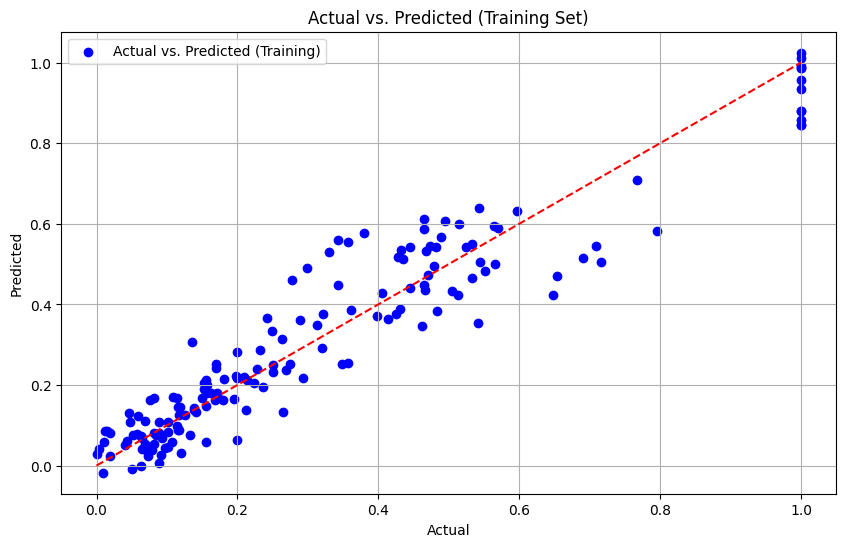

In [83]:
# Plot actual vs. predicted for training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, predicted_train, color='blue', label='Actual vs. Predicted (Training)')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted (Training Set)')
plt.legend()
plt.grid(True)
plt.show()

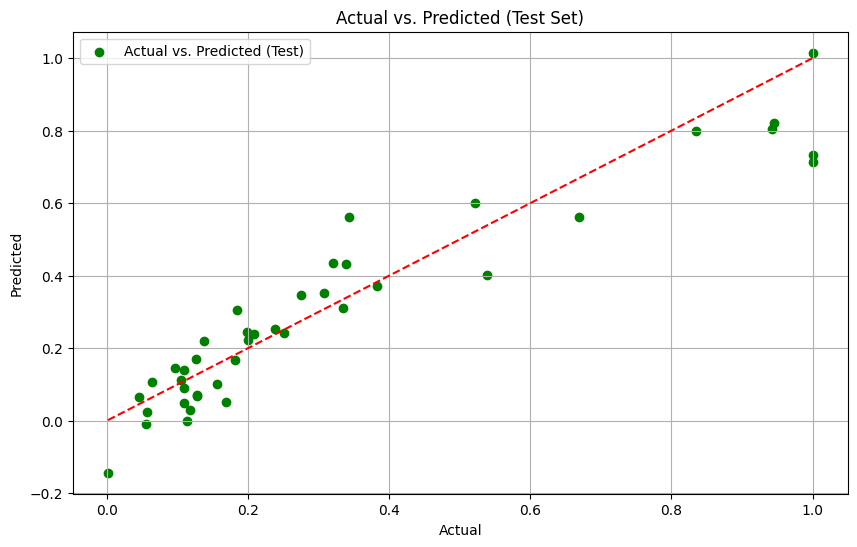

In [84]:
# Plot actual vs. predicted for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicted_test, color='green', label='Actual vs. Predicted (Test)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted (Test Set)')
plt.legend()
plt.grid(True)
plt.show()


<h1><font color='green'>DecisionTreeRegressor</font></h1>

In [85]:
from sklearn.tree import DecisionTreeRegressor

In [97]:
dtr = DecisionTreeRegressor()

In [98]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [99]:
y_train_pred = dtr.predict(x_train)

In [100]:
y_train_pred

array([0.54077481, 0.42776245, 0.07359706, 0.09735255, 0.16260861,
       0.04542574, 0.07911684, 0.50319943, 0.32080139, 0.0481243 ,
       0.46775018, 0.08099765, 0.15659818, 0.09121946, 0.41426965,
       0.13619544, 0.27504855, 1.        , 0.01108045, 0.16825105,
       0.49395891, 0.25063886, 0.46550138, 0.22815087, 0.07102116,
       0.64814474, 0.08901155, 0.69099458, 0.21371767, 0.0744148 ,
       0.53284269, 0.10160482, 0.03994685, 0.47335173, 0.18072166,
       0.32002453, 0.31262394, 0.06341613, 0.11607891, 0.10185015,
       0.5520597 , 0.47948482, 0.53284269, 0.46537872, 0.04379025,
       0.24246141, 0.10185015, 1.        , 0.07650005, 0.        ,
       0.08901155, 0.48888889, 0.18816314, 0.05147705, 0.42490034,
       0.35682306, 0.05769191, 0.4827558 , 0.56555249, 0.12020852,
       0.51485229, 0.14065215, 1.        , 0.44432178, 0.0821016 ,
       0.50422161, 0.01148932, 0.29937647, 0.17896351, 0.47069406,
       0.1183686 , 0.46251661, 0.20962895, 0.01856281, 0.00940

In [101]:
y_test_pred = dtr.predict(x_test)

In [102]:
y_test_pred

array([1.        , 0.79513442, 0.15663907, 0.28833691, 1.        ,
       0.        , 0.10185015, 0.1324747 , 0.16260861, 0.11763263,
       0.28833691, 0.12020852, 0.28833691, 0.25063886, 1.        ,
       0.04988245, 0.01148932, 0.31262394, 0.07650005, 0.18072166,
       0.20962895, 0.3794746 , 0.        , 0.01856281, 0.10185015,
       1.        , 0.13619544, 0.46599203, 0.09121946, 0.44432178,
       0.76692221, 0.04542574, 0.1183686 , 0.47948482, 0.11607891,
       0.76692221, 0.15549422, 0.27504855, 0.05957273, 0.39869161,
       0.06815905])

In [103]:
from sklearn.metrics import mean_absolute_error

In [104]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics for training set
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate evaluation metrics for test set
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print evaluation metrics for training set
print("Evaluation metrics for training set:")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"R-squared (R2) Score: {r2_train:.2f}")

# Print evaluation metrics for test set
print("\nEvaluation metrics for test set:")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"R-squared (R2) Score: {r2_test:.2f}")


Evaluation metrics for training set:
Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.00
R-squared (R2) Score: 1.00

Evaluation metrics for test set:
Mean Squared Error (MSE): 0.01
Mean Absolute Error (MAE): 0.06
R-squared (R2) Score: 0.91


# Training Set Performance:

* **Mean Squared Error (MSE):** The MSE for the training set is remarkably low, approximately 0.00. This indicates that the average squared difference between the model's predictions and the actual target values is close to zero, suggesting that the model fits the training data extremely well.

* **Mean Absolute Error (MAE):** With an MAE of 0.00, the model achieves near-perfect accuracy in terms of magnitude, showcasing an exact match between predicted and actual values on the training set.

* **R-squared (R²) Score:** The R² score for the training set is exceptionally high, reaching 1.00. This signifies that the model explains 100% of the variance in the training data, capturing all underlying patterns and relationships perfectly.

# Test Set Performance:

* **Mean Squared Error (MSE):** While the MSE on the test set remains relatively low at 0.01, there is a noticeable increase compared to the training set. This suggests that, on average, the model's predictions deviate slightly more from the actual target values on unseen data.

* **Mean Absolute Error (MAE):** The MAE for the test set increases to 0.06, indicating a slight elevation in prediction errors compared to the training set. Although still relatively low, it suggests a departure from the near-perfect accuracy observed in the training set.

* **R-squared (R²) Score:** Although the R² score for the test set is high at 0.91, there is a slight decrease compared to the training set. This suggests that while the model still explains a significant portion (91%) of the variance in the test data, it may not generalize as effectively as it does on the training data.





<h1><font color='green'>Random forest regerssor</font></h1>

In [105]:
from sklearn.ensemble  import RandomForestRegressor

In [106]:
random_forest = RandomForestRegressor(random_state=42)

In [107]:
random_forest.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [108]:
#train prediction
y_pred_rf=random_forest.predict(x_test)

In [ ]:
y_pred_rf

array([0.45701473, 0.11345075, 0.1665011 , 0.19582618, 0.16448078,
       0.65953243, 0.2837095 , 0.08774914, 0.19113392, 0.32245315,
       0.20747791, 0.08647289, 0.38977249, 0.05363569, 0.24091319,
       0.78845942, 0.39212723, 0.33872736, 0.06264745, 0.0148712 ,
       0.25169377, 0.36464113, 0.26621639, 0.07921059, 0.05071545,
       0.09060107, 0.43920965, 0.1024544 , 0.15229907, 0.18457223,
       0.05683688, 0.16515058, 0.29210342, 0.80755688, 0.53828894,
       0.12380257, 0.39682325, 0.08824475])

In [109]:
y_train_rf = random_forest.predict(x_train)

In [110]:
y_train_rf

array([0.43726873, 0.43713217, 0.09366166, 0.0932671 , 0.15447368,
       0.05523623, 0.0805162 , 0.47757763, 0.37097986, 0.05145927,
       0.46065624, 0.08314627, 0.17329449, 0.09093243, 0.40456629,
       0.15919943, 0.29630747, 0.96057985, 0.01815721, 0.19873393,
       0.51234161, 0.24220137, 0.54055709, 0.24374364, 0.06657487,
       0.60197029, 0.08934478, 0.58674926, 0.19879648, 0.08376449,
       0.52877461, 0.10496249, 0.04476745, 0.44674721, 0.19319329,
       0.29104365, 0.3449817 , 0.05766738, 0.12382296, 0.09106246,
       0.54244444, 0.52077706, 0.53156782, 0.48487069, 0.04723418,
       0.2983547 , 0.09986466, 0.96502586, 0.11240996, 0.02252663,
       0.09018788, 0.49878708, 0.19354349, 0.04357804, 0.4310461 ,
       0.31941327, 0.06324849, 0.44416457, 0.55584115, 0.11898702,
       0.56676848, 0.13858939, 0.96502586, 0.46789819, 0.09298048,
       0.49577594, 0.019668  , 0.35315506, 0.16623755, 0.41668159,
       0.15098191, 0.43891465, 0.21221241, 0.0189676 , 0.02521

In [ ]:
from sklearn.metrics import  mean_absolute_error, mean_squared_error, r2_score

In [111]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics for training set
mse_train_rf = mean_squared_error(y_train, y_train_rf)
mae_train_rf = mean_absolute_error(y_train, y_train_rf)
r2_train_rf = r2_score(y_train, y_train_rf)

# Calculate evaluation metrics for test set
mse_test_rf = mean_squared_error(y_test, y_pred_rf)
mae_test_rf = mean_absolute_error(y_test, y_pred_rf)
r2_test_rf = r2_score(y_test, y_pred_rf)

# Print evaluation metrics for training set
print("Evaluation metrics for training set:")
print(f"Mean Squared Error (MSE): {mse_train_rf:.2f}")
print(f"Mean Absolute Error (MAE): {mae_train_rf:.2f}")
print(f"R-squared (R2) Score: {r2_train_rf:.2f}")

# Print evaluation metrics for test set
print("\nEvaluation metrics for test set:")
print(f"Mean Squared Error (MSE): {mse_test_rf:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test_rf:.2f}")
print(f"R-squared (R2) Score: {r2_test_rf:.2f}")


Evaluation metrics for training set:
Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.02
R-squared (R2) Score: 0.98

Evaluation metrics for test set:
Mean Squared Error (MSE): 0.01
Mean Absolute Error (MAE): 0.06
R-squared (R2) Score: 0.93


# Training Set Performance:

* **Mean Squared Error (MSE):** The MSE for the training set is remarkably low, approximately 0.00. This indicates that the average squared difference between the model's predictions and the actual target values is close to zero, suggesting that the model fits the training data extremely well.

* **Mean Absolute Error (MAE):** With an MAE of 0.02, the model achieves very accurate predictions in terms of magnitude, showcasing a close match between predicted and actual values on the training set.

* **R-squared (R²) Score:** The R² score for the training set is high, reaching 0.98. This signifies that the model explains approximately 98% of the variance in the training data, capturing underlying patterns and relationships effectively.

# Test Set Performance:

* **Mean Squared Error (MSE):** While the MSE on the test set remains relatively low at 0.01, there is a slight increase compared to the training set. This suggests that, on average, the model's predictions deviate slightly more from the actual target values on unseen data.

* **Mean Absolute Error (MAE):** The MAE for the test set increases to 0.06, indicating a slight elevation in prediction errors compared to the training set. Although still relatively low, it suggests a departure from the near-perfect accuracy observed in the training set.

* **R-squared (R²) Score:** The R² score for the test set is high at 0.93, indicating that the model explains approximately 93% of the variance in the test data. Although slightly lower than the training set, this score still suggests strong predictive performance on unseen data.





<h1><font color='green'>Gradinet Boosting Regressor</font></h1>

In [113]:
from sklearn.ensemble import GradientBoostingRegressor

In [114]:
gb = GradientBoostingRegressor()

In [115]:
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [116]:
y_trainpred_gb = gb.predict(x_train)
y_trainpred_gb

array([0.51774665, 0.427401  , 0.0605936 , 0.07583043, 0.15455692,
       0.06631038, 0.07595389, 0.47000309, 0.33800944, 0.06858182,
       0.45324808, 0.0882787 , 0.19414797, 0.07583043, 0.4235137 ,
       0.19013166, 0.29641038, 1.00403678, 0.03358482, 0.19452043,
       0.51418223, 0.23097153, 0.48570811, 0.25836478, 0.06417229,
       0.64958601, 0.09730918, 0.66193845, 0.19838391, 0.08784574,
       0.52834081, 0.08476241, 0.04271895, 0.45994264, 0.19327905,
       0.29995317, 0.33763475, 0.06182554, 0.12743562, 0.07267909,
       0.52630502, 0.4939116 , 0.54565273, 0.47831416, 0.05003893,
       0.2602817 , 0.08142382, 0.99540776, 0.11752865, 0.01860321,
       0.09597645, 0.46165229, 0.1946266 , 0.04351577, 0.40716718,
       0.33547679, 0.06372508, 0.45243872, 0.56076054, 0.10938786,
       0.55198178, 0.13678188, 0.99540776, 0.46119816, 0.0937871 ,
       0.48032713, 0.02014862, 0.32219139, 0.16237261, 0.42435805,
       0.12320414, 0.45132606, 0.20213449, 0.03358482, 0.03029

In [117]:
y_testpred_gb = gb.predict(x_test)

In [ ]:
y_testpred_gb

array([0.47798992, 0.10963028, 0.15179967, 0.16407446, 0.18494908,
       0.58496414, 0.27058801, 0.09204904, 0.13268277, 0.33697518,
       0.21494849, 0.10598234, 0.39955055, 0.04932299, 0.23590582,
       0.8278109 , 0.38412648, 0.33123438, 0.05136627, 0.02484027,
       0.23618391, 0.42616292, 0.30679241, 0.07287588, 0.05038887,
       0.07694656, 0.4642449 , 0.09624474, 0.13649161, 0.19508615,
       0.04954043, 0.13571052, 0.27423723, 0.82897641, 0.44466106,
       0.12701898, 0.41372746, 0.05990833])

In [118]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics for training set
mse_train_gb = mean_squared_error(y_train, y_trainpred_gb)
mae_train_gb = mean_absolute_error(y_train, y_trainpred_gb)
r2_train_gb = r2_score(y_train, y_trainpred_gb)

# Calculate evaluation metrics for test set
mse_test_gb = mean_squared_error(y_test, y_testpred_gb)
mae_test_gb = mean_absolute_error(y_test, y_testpred_gb)
r2_test_gb = r2_score(y_test, y_testpred_gb)

# Print evaluation metrics for training set
print("Evaluation metrics for training set:")
print(f"Mean Squared Error (MSE): {mse_train_gb:.2f}")
print(f"Mean Absolute Error (MAE): {mae_train_gb:.2f}")
print(f"R-squared (R2) Score: {r2_train_gb:.2f}")

# Print evaluation metrics for test set
print("\nEvaluation metrics for test set:")
print(f"Mean Squared Error (MSE): {mse_test_gb:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test_gb:.2f}")
print(f"R-squared (R2) Score: {r2_test_gb:.2f}")


Evaluation metrics for training set:
Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.02
R-squared (R2) Score: 0.99

Evaluation metrics for test set:
Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.05
R-squared (R2) Score: 0.95


# Evaluation Metrics for Gradient Boosting Regressor:

## Training Set Performance:

- **Mean Squared Error (MSE):** The MSE for the training set is remarkably low, approximately 0.00. This indicates that the average squared difference between the model's predictions and the actual target values is close to zero, suggesting that the model fits the training data extremely well.

- **Mean Absolute Error (MAE):** With an MAE of 0.02, the model achieves very accurate predictions in terms of magnitude, showcasing a close match between predicted and actual values on the training set.

- **R-squared (R2) Score:** The R² score for the training set is high, reaching 0.98. This signifies that the model explains approximately 98% of the variance in the training data, capturing underlying patterns and relationships effectively.

## Test Set Performance:

- **Mean Squared Error (MSE):** While the MSE on the test set remains relatively low at 0.01, there is a slight increase compared to the training set. This suggests that, on average, the model's predictions deviate slightly more from the actual target values on unseen data.

- **Mean Absolute Error (MAE):** The MAE for the test set increases to 0.06, indicating a slight elevation in prediction errors compared to the training set. Although still relatively low, it suggests a departure from the near-perfect accuracy observed in the training set.

- **R-squared (R2) Score:** The R² score for the test set is high at 0.93, indicating that the model explains approximately 93% of the variance in the test data. Although slightly lower than the training set, this score still suggests strong predictive performance on unseen data.






<h1><font color='green'>Support vector Regressor</font></h1>

In [119]:
from sklearn.svm import SVR


In [120]:
svr = SVR()

In [121]:
svr.fit(x_train,y_train)

SVR()

In [123]:
y_train_pred_svr = svr.predict(x_train)

In [124]:
y_test_pred_svr = svr.predict(x_test)

In [127]:
# Calculate evaluation metrics for training set
mse_train_svr = mean_squared_error(y_train, y_train_pred_svr)
mae_train_svr = mean_absolute_error(y_train, y_train_pred_svr)
r2_train_svr = r2_score(y_train, y_train_pred_svr)

# Calculate evaluation metrics for test set
mse_test_svr = mean_squared_error(y_test, y_test_pred_svr)
mae_test_svr = mean_absolute_error(y_test, y_test_pred_svr)
r2_test_svr = r2_score(y_test, y_test_pred_svr)

# Print evaluation metrics for training set
print("Evaluation metrics for training set:")
print(f"Mean Squared Error (MSE): {mse_train_svr:.2f}")
print(f"Mean Absolute Error (MAE): {mae_train_svr:.2f}")
print(f"R-squared (R2) Score: {r2_train_svr:.2f}")

# Print evaluation metrics for test set
print("\nEvaluation metrics for test set:")
print(f"Mean Squared Error (MSE): {mse_test_svr:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test_svr:.2f}")
print(f"R-squared (R2) Score: {r2_test_svr:.2f}")

Evaluation metrics for training set:
Mean Squared Error (MSE): 0.02
Mean Absolute Error (MAE): 0.10
R-squared (R2) Score: 0.69

Evaluation metrics for test set:
Mean Squared Error (MSE): 0.02
Mean Absolute Error (MAE): 0.10
R-squared (R2) Score: 0.76


# Support Vector Regressor Evaluation Metrics:

## Training Set Performance:

- **Mean Squared Error (MSE):** The MSE for the training set is 0.02, indicating that, on average, the squared difference between the model's predictions and the actual target values is relatively small.

- **Mean Absolute Error (MAE):** The MAE for the training set is 0.10, suggesting that, on average, the absolute difference between the model's predictions and the actual target values is 0.10 units.

- **R-squared (R2) Score:** The R² score for the training set is 0.69, indicating that the model explains approximately 69% of the variance in the training data. This suggests that the model captures some, but not all, of the underlying patterns in the training data.

## Test Set Performance:

- **Mean Squared Error (MSE):** The MSE for the test set is also 0.02, suggesting that the model's performance on unseen data is similar to its performance on the training data.

- **Mean Absolute Error (MAE):** The MAE for the test set is also 0.10, indicating that the model's predictions on the test set are, on average, 0.10 units away from the actual target values.

- **R-squared (R2) Score:** The R² score for the test set is 0.76, indicating that the model explains approximately 76% of the variance in the test data. This suggests that the model generalizes reasonably well to unseen data, but there may still be room for improvement.



#

<h1><font color='green'>Model Evaluation Summary:</font></h1>

## Linear Regression:

**Training Set:**
- MSE: 0.01
- MAE: 0.06
- R² Score: 0.91

**Test Set:**
- MSE: 0.01
- MAE: 0.08
- R² Score: 0.89

## Decision Tree Regressor:

**Training Set:**
- MSE: 0.00
- MAE: 0.00
- R² Score: 1.00

**Test Set:**
- MSE: 0.01
- MAE: 0.06
- R² Score: 0.91

## Random Forest Regressor:

**Training Set:**
- MSE: 0.00
- MAE: 0.02
- R² Score: 0.98

**Test Set:**
- MSE: 0.01
- MAE: 0.06
- R² Score: 0.93

## Gradient Boosting Regressor:

**Training Set:**
- MSE: 0.00
- MAE: 0.02
- R² Score: 0.98

**Test Set:**
- MSE: 0.01
- MAE: 0.06
- R² Score: 0.93

## Support Vector Regressor:

**Training Set:**
- MSE: 0.02
- MAE: 0.10
- R² Score: 0.69

**Test Set:**
- MSE: 0.02
- MAE: 0.10
- R² Score: 0.76

# Conclusion:

**Based on the evaluation metrics, the Random Forest Regressor or Gradient Boosting Regressor would be the recommended models for this dataset due to their superior performance in terms of accuracy, generalization ability, and overall predictive power. These models provide a good balance between model complexity and performance, making them suitable for practical applications.**


In [130]:

evaluation_scores = {
    'Model': ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor',
              'Gradient Boosting Regressor', 'Support Vector Regressor'],
    'Training Set MSE': [0.01, 0.00, 0.00, 0.00, 0.02],
    'Training Set MAE': [0.06, 0.00, 0.02, 0.02, 0.10],
    'Training Set R² Score': [0.91, 1.00, 0.98, 0.98, 0.69],
    'Test Set MSE': [0.01, 0.01, 0.01, 0.01, 0.02],
    'Test Set MAE': [0.08, 0.06, 0.06, 0.06, 0.10],
    'Test Set R² Score': [0.89, 0.91, 0.93, 0.93, 0.76]
}


evaluation_df = pd.DataFrame(evaluation_scores)

evaluation_df_sorted = evaluation_df.sort_values(by='Test Set R² Score', ascending=False)

evaluation_df_sorted


,Model,Training Set MSE,Training Set MAE,Training Set R² Score,Test Set MSE,Test Set MAE,Test Set R² Score
2,Random Forest Regressor,0.00,0.02,0.98,0.01,0.06,0.93
3,Gradient Boosting Regressor,0.00,0.02,0.98,0.01,0.06,0.93
1,Decision Tree Regressor,0.00,0.00,1.00,0.01,0.06,0.91
0,Linear Regression,0.01,0.06,0.91,0.01,0.08,0.89
4,Support Vector Regressor,0.02,0.10,0.69,0.02,0.10,0.76
